In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import math
import time
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision = 8)
np.set_printoptions(suppress=True)

In [2]:
o = open(r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\nmea.txt', 'r')
dane_wejsciowe = []
data_ok = False
for line in o.readlines():
    wart = line.strip().split(',')
    if len(wart)<2:
        continue
    if wart[0] == '$GPZDA' and wart[2] not in ['06']:
        data_ok = False
    if data_ok == True and float(wart[1]) <= 190000 and float(wart[1]) >= 180000 and len(wart)>10:
        #print(wart)
        dane_wejsciowe.append(line)
        continue
    if wart[0] == '$GPZDA' and wart[2] in ['06']: 
        data_ok = True
        
print(len(dane_wejsciowe))
o.close()

wr = open(r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\dane_wejsciowe_prze_6_03.txt', 'w')
for line in dane_wejsciowe:
    wr.writelines(line)
    

wr.close()

3601


In [3]:
o = open(r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\nmea.txt', 'r')
dane_wejsciowe = []
data_ok = False
for line in o.readlines():
    wart = line.strip().split(',')
    if len(wart)<2:
        continue
    if wart[0] == '$GPZDA' and wart[2] not in ['09']:
        data_ok = False
    if data_ok == True and float(wart[1]) <= 190000 and float(wart[1]) >= 180000 and len(wart)>10:
        #print(wart)
        dane_wejsciowe.append(line)
        continue
    if wart[0] == '$GPZDA' and wart[2] in ['09']: 
        data_ok = True
        
print(len(dane_wejsciowe))
o.close()

wr = open(r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\dane_wejsciowe_prze_9_03.txt', 'w')
for line in dane_wejsciowe:
    wr.writelines(line)
    

wr.close()

3601


In [4]:
#wczytywanie dataframe
path_06 = r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\dane_wejsciowe_prze_6_03.txt'
path_09 = r'C:\aa_sem_i\PiPG_I\temat_1\dane_wejsciowe\dane_wejsciowe_prze_9_03.txt'

df_06 = pd.read_csv(path_06,header=None)
df_09 = pd.read_csv(path_09,header=None)


#zamiana czasu hhmmss na h 
time_list_06 = np.array(df_06[1])
time_list_09 = np.array(df_09[1])

def hms(time_list):
    h = np.trunc(time_list/10000)
    m = np.trunc(((time_list/10000) - h)*100)
    s = (((time_list/10000) - h)*100 - m)*100
    return h+m/60+s/3600
    
hms_06 = hms(time_list_06)
hms_09 = hms(time_list_09)

In [5]:
def st_dz(list_st):
    '''funkcja zmieniająca stopnie, minuty na ułamki dziesiętne'''
    st = np.trunc(list_st/100)
    m = (list_st/100 - st)*100
    #print(st+m/60)
    return st+m/60


# zmiana stopni na ułamki dziesiętne
list_s_06 = np.array(df_06[2])
fi_06 = st_dz(list_s_06)
list_s_09 = np.array(df_09[2])
fi_09 = st_dz(list_s_09)

list_d_06 = np.array(df_06[4])
lam_06 = st_dz(list_d_06)
list_d_09 = np.array(df_09[4])
lam_09 = st_dz(list_d_09)


#wczytanie wysokości
h_06 = np.array(df_06[9])
h_09 = np.array(df_09[9])


#liczneie średnich
s_fi_06 = np.mean(fi_06)
s_fi_09 = np.mean(fi_09)
s_lam_06 = np.mean(lam_06)
s_lam_09 = np.mean(lam_09)
s_h_06 = np.mean(h_06)
s_h_09 = np.mean(h_09)


#liczenie wyników końcowych
R = 6371000
ro = np.pi/180
w_fi_06 = ((fi_06 - s_fi_06)*ro)*R
print(fi_06[0] - s_fi_06)
print(w_fi_06[0])
w_fi_09 = ((fi_09 - s_fi_09)*ro)*R
w_lam_06 = ((lam_06 - s_lam_06)*ro)*R*np.cos(fi_06*ro)
w_lam_09 = ((lam_09 - s_lam_09)*ro)*R*np.cos(fi_09*ro)
w_h_06 = h_06 - s_h_06
w_h_09 = h_09 - s_h_09

-6.074307236758614e-06
-0.6754321476078864


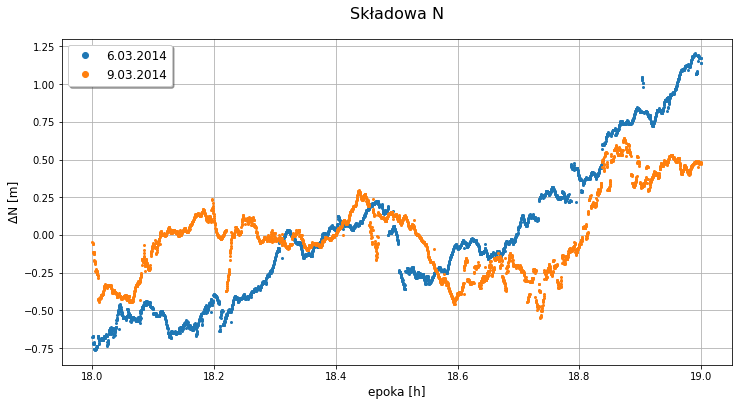

In [6]:
plt.figure(figsize=(12,6))
plt.title('Składowa N', fontsize = 16, pad = 20)
#plt.xlim(-0.5,11.5)
#plt.ylim(-6,6)
plt.xlabel('epoka [h]', fontsize = 12)
plt.ylabel('ΔN [m]', fontsize = 12)
plt.grid(True)

plt.plot(hms_06, w_fi_06, 'o', markersize = 2, label = '6.03.2014')
plt.plot(hms_09, w_fi_09, 'o', markersize = 2, label = '9.03.2014')
plt.legend(loc='upper left', shadow=True, fontsize = 12, markerscale = 3)
plt.savefig(r'C:\aa_sem_i\PiPG_I\temat_1\dane_przetworzone\N.png', dpi = 300, bbox_inches = 'tight',)
plt.show()


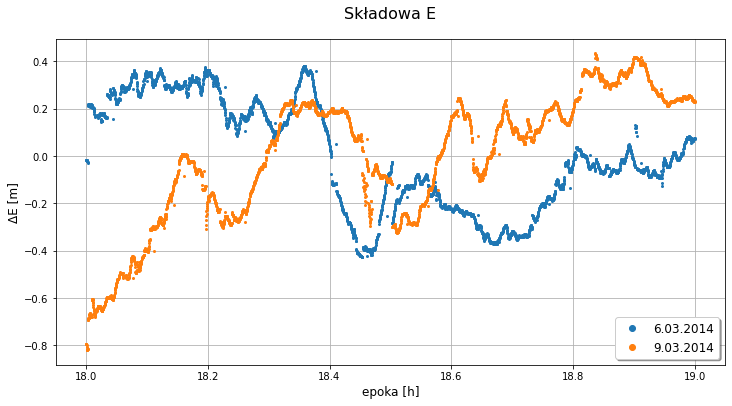

In [7]:
plt.figure(figsize=(12,6))
plt.title('Składowa E', fontsize = 16, pad = 20)
#plt.xlim(-0.5,11.5)
#plt.ylim(-6,6)
plt.xlabel('epoka [h]', fontsize = 12)
plt.ylabel('ΔE [m]', fontsize = 12)
plt.grid(True)

plt.plot(hms_06, w_lam_06, 'o', markersize = 2, label = '6.03.2014')
plt.plot(hms_09, w_lam_09, 'o', markersize = 2, label = '9.03.2014')
plt.legend(loc='lower right', shadow=True, fontsize = 12, markerscale = 3)
plt.savefig(r'C:\aa_sem_i\PiPG_I\temat_1\dane_przetworzone\E.png', dpi = 300, bbox_inches = 'tight')
plt.show()


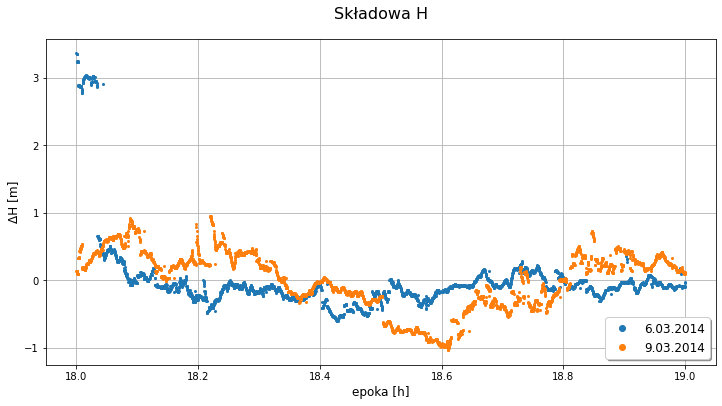

In [8]:
plt.figure(figsize=(12,6))
plt.title('Składowa H', fontsize = 16, pad = 20)
#plt.xlim(-0.5,11.5)
#plt.ylim(-6,6)
plt.xlabel('epoka [h]', fontsize = 12)
plt.ylabel('ΔH [m]', fontsize = 12)
plt.grid(True)

plt.plot(hms_06, w_h_06, 'o', markersize = 2, label = '6.03.2014')
plt.plot(hms_09, w_h_09, 'o', markersize = 2, label = '9.03.2014')
plt.legend(loc='lower right', shadow=True, fontsize = 12, markerscale = 3)
plt.savefig(r'C:\aa_sem_i\PiPG_I\temat_1\dane_przetworzone\h.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [9]:
def st_dz(list_st):
    st = np.trunc(list_st/100)
    m = list_st/100 - st
    print(st+m/60)
    return st+m/60

list_s_06 = np.array(df_06[2])
#print(list_s_06)
fi_06 = st_dz(list_s_06)
list_s_09 = np.array(df_09[2])


[50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097 50.00066097
 50.00066097 50.00066097 50.00066097 50.00066098 50